In [9]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt 

In [10]:
vsstore = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Superstore.csv", encoding='latin1')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Superstore.csv'

# EDA of the df

In [ ]:
vsstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
vsstore['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [ ]:
vsstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Checks for null values

In [ ]:
vsstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# checks for duplicates


In [ ]:
for column in vsstore.columns:
    duplicates = vsstore[column].duplicated()
    print(f"Column {column}: {duplicates.any()}")

Column Row ID: False
Column Order ID: True
Column Order Date: True
Column Ship Date: True
Column Ship Mode: True
Column Customer ID: True
Column Customer Name: True
Column Segment: True
Column Country: True
Column City: True
Column State: True
Column Postal Code: True
Column Region: True
Column Product ID: True
Column Category: True
Column Sub-Category: True
Column Product Name: True
Column Sales: True
Column Quantity: True
Column Discount: True
Column Profit: True


# Creates a Product table from the original one

In [ ]:
product_table = vsstore[["Product ID", "Product Name",  "Category", "Sub-Category"]]

NameError: name 'vsstore' is not defined

In [ ]:
product_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 0 to 9935
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    1894 non-null   object
 1   Product Name  1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
dtypes: object(4)
memory usage: 74.0+ KB


# checks for duplicates

In [ ]:
product_table[product_table.duplicated(keep=False)].sort_values("Product ID")

,Product ID,Product Name,Category,Sub-Category


In [ ]:
product_table.drop_duplicates(subset=["Product ID", "Product Name"], inplace=True)


C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4168409171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_table.drop_duplicates(subset=["Product ID", "Product Name"], inplace=True)


In [ ]:
product_table["Product ID"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9521    False
9562    False
9604    False
9673    False
9935    False
Name: Product ID, Length: 1894, dtype: bool

In [ ]:
display(product_table)

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
9521,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
9562,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines
9604,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
9673,TEC-PH-10002645,LG G2,Technology,Phones


# checks for non unique values in the product table

In [ ]:
product_table.nunique()

Product ID      1862
Product Name    1850
Category           3
Sub-Category      17
dtype: int64

In [ ]:
ids = vsstore["Product ID"]
result = product_table[ids.isin(ids.duplicated())].sort_values("Product ID")
print(result)


Empty DataFrame
Columns: [Product ID, Product Name, Category, Sub-Category]
Index: []


 # Checks if any "Product ID"  corresponds to more than one "Product Name" in the product table; prints the mismatches

In [ ]:
def check_product_id_name_correspondence(product_table):
    is_unique_mapping = product_table.groupby('Product ID')['Product Name'].nunique() == 1
    mismatches = product_table[~product_table['Product ID'].isin(is_unique_mapping[is_unique_mapping].index)]
    return mismatches

mismatched_rows = check_product_id_name_correspondence(product_table)

if mismatched_rows.empty:
    print("All Product IDs correspond to a unique Product Name.")
else:
    print("Product ID - Product Name mismatches:")
    print(mismatched_rows)

Product ID - Product Name mismatches:
           Product ID                                       Product Name  \
29    FUR-FU-10004848  Howard Miller 13-3/4" Diameter Brushed Chrome ...   
66    FUR-CH-10001146        Global Value Mid-Back Manager's Chair, Gray   
70    OFF-BI-10004654  Avery Binding System Hidden Tab Executive Styl...   
128   FUR-CH-10001146                           Global Task Chair, Black   
131   OFF-PA-10002377                                         Xerox 1916   
...               ...                                                ...   
4791  OFF-PA-10001166                                         Xerox 1932   
5317  FUR-FU-10004864                   Eldon 500 Class Desk Accessories   
5407  OFF-PA-10003022  Standard Line While You Were Out Hardbound T...   
5513  TEC-PH-10001795  RCA H5401RE1 DECT 6.0 4-Line Cordless Handset ...   
5951  OFF-BI-10002026                  Ibico Recycled Linen-Style Covers   

             Category Sub-Category  
29          

# Creates a new temporary column with unique Product IDs and replaces the mismatches

In [237]:

def replace_duplicate_product_ids(product_table):
    product_table['Unique Product ID'] = product_table.groupby('Product ID').cumcount() + 1
    product_table['Product ID'] = product_table['Product ID'].astype(str) + '_' + product_table['Unique Product ID'].astype(str)
    # Drops the temporary column used for counting
    product_table.drop(columns=['Unique Product ID'], inplace=True)
    return product_table


duplicated_ids_mask = product_table.duplicated(subset=['Product ID'], keep=False) #shows where the duplictaes are
duplicates_to_replace = product_table[duplicated_ids_mask] # replaces instances where "Product ID" is the same but "Product Name" is diff


product_table.loc[duplicated_ids_mask] = replace_duplicate_product_ids(duplicates_to_replace) #applies the function only to the identified duplicates
print(product_table)


           Product ID                                       Product Name  \
0     FUR-BO-10001798                  Bush Somerset Collection Bookcase   
1     FUR-CH-10000454  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2     OFF-LA-10000240  Self-Adhesive Address Labels for Typewriters b...   
3     FUR-TA-10000577      Bretford CR4500 Series Slim Rectangular Table   
4     OFF-ST-10000760                     Eldon Fold 'N Roll Cart System   
...               ...                                                ...   
9521  TEC-PH-10002817                    RCA ViSYS 25425RE1 Corded phone   
9562  TEC-MA-10003589                       Cisco 8961 IP Phone Charcoal   
9604  OFF-AP-10003099                        Eureka Hand Vacuum, Bagless   
9673  TEC-PH-10002645                                              LG G2   
9935  OFF-ST-10001627  Eldon Jumbo ProFile Portable File Boxes Graphi...   

             Category Sub-Category  
0           Furniture    Bookcases  
1           F

C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4148034885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_table['Unique Product ID'] = product_table.groupby('Product ID').cumcount() + 1
C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4148034885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_table['Product ID'] = product_table['Product ID'].astype(str) + '_' + product_table['Unique Product ID'].astype(str)
C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4148034885.py:9: Settin

# Creates a function that checks if the replacement of the duplicated Product IDs worked

In [238]:
original_unique_count = product_table['Product ID'].nunique()
replaced_unique_count = replace_duplicate_product_ids(product_table)['Product ID'].nunique()

if replaced_unique_count == original_unique_count:
    print("Replacement worked. All Product IDs are now unique.")
else:
    print(f"Replacement may not have worked. Original unique count: {original_unique_count}, Replaced unique count: {replaced_unique_count}")



Replacement worked. All Product IDs are now unique.


C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4148034885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_table['Unique Product ID'] = product_table.groupby('Product ID').cumcount() + 1
C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4148034885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_table['Product ID'] = product_table['Product ID'].astype(str) + '_' + product_table['Unique Product ID'].astype(str)
C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\4148034885.py:9: Settin

# Resets the indexing

In [413]:
product_table.reset_index(drop=True)

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798_1,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454_1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240_1,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577_1,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760_1,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1889,TEC-PH-10002817_1,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589_1,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099_1,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
1892,TEC-PH-10002645_1,LG G2,Technology,Phones


# Creates a Customers table from the original big df

In [572]:
customers_table = vsstore[['Customer ID', 'Customer Name', 'Segment', "Order ID"]]

In [573]:
customers_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    9994 non-null   object
 1   Customer Name  9994 non-null   object
 2   Segment        9994 non-null   object
 3   Order ID       9994 non-null   object
dtypes: object(4)
memory usage: 312.4+ KB


In [574]:
customers_table_new= customers_table.drop_duplicates(subset=['Customer ID', 'Customer Name'])

In [578]:
customers_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    5009 non-null   object
 1   Customer Name  5009 non-null   object
 2   Segment        5009 non-null   object
 3   Order ID       5009 non-null   object
 4   LocationID     632 non-null    object
dtypes: object(5)
memory usage: 363.8+ KB


In [577]:
#The location table is created below; A Location ID is generated below; i want to add the Location ID to customers table
customers_table = pd.merge(customers_table, location_column[['LocationID']], left_index=True, right_index=True, how='left')

In [557]:
customers_table.head()

,Customer ID,Customer Name,Segment,Order ID,LocationID
0,CG-12520,Claire Gute,Consumer,CA-2016-152156,LL000001
2,DV-13045,Darrin Van Huff,Corporate,CA-2016-138688,LL000002
3,SO-20335,Sean O'Donnell,Consumer,US-2015-108966,LL000003
5,BH-11710,Brosina Hoffman,Consumer,CA-2014-115812,LL000004
12,AA-10480,Andrew Allen,Consumer,CA-2017-114412,LL000005


In [558]:
customers_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    5009 non-null   object
 1   Customer Name  5009 non-null   object
 2   Segment        5009 non-null   object
 3   Order ID       5009 non-null   object
 4   LocationID     632 non-null    object
dtypes: object(5)
memory usage: 234.8+ KB


In [575]:
#removes OrderID duplicates 
customers_table.drop_duplicates(subset='Order ID', keep='first', inplace=True)


C:\Users\dariy\AppData\Local\Temp\ipykernel_45880\3317569519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_table.drop_duplicates(subset='Order ID', keep='first', inplace=True)


# Analog to the Product ID, here I check for Customer ID duplicates 

In [555]:
def check_customer_id_name_correspondence(customers_table):
    
    unique_mapping = customers_table.groupby('Customer ID')['Customer Name'].nunique() == 1
    mismatch_rows = customers_table[~customers_table['Customer ID'].isin(unique_mapping[unique_mapping].index)]
    return mismatch_rows

mismatch_rows = check_customer_id_name_correspondence(customers_table)

if mismatch_rows.empty:
    print("All Customer IDs correspond to a unique Customer Name.")
else:
    print("Customer ID - Customer Name mismatches:")
    print(mismatch_rows)


All Customer IDs correspond to a unique Customer Name.


# Creates a Location table

In [358]:
location_column= vsstore[["Country", "City", "Region", "State", "Postal Code"]].drop_duplicates()

In [359]:
location_column

,Country,City,Region,State,Postal Code
0,United States,Henderson,South,Kentucky,42420
2,United States,Los Angeles,West,California,90036
3,United States,Fort Lauderdale,South,Florida,33311
5,United States,Los Angeles,West,California,90032
12,United States,Concord,South,North Carolina,28027
...,...,...,...,...,...
9760,United States,Springdale,South,Arkansas,72762
9801,United States,Lodi,West,California,95240
9834,United States,La Porte,Central,Texas,77571
9868,United States,Mason,East,Ohio,45040


# Creates a new column ("LocationID") that will serves as a unique key for the Location table

In [360]:
location_column['LocationID'] = range(1, len(location_column) + 1)

In [544]:

#Prepends "L" to the LocationID and zero-fill to a certain length (6 digits)
location_column['LocationID'] = "L" +location_column['LocationID'].astype(str).str.zfill(6)


In [545]:
location_column

,Country,City,Region,State,Postal Code,LocationID
0,United States,Henderson,South,Kentucky,42420,LL000001
2,United States,Los Angeles,West,California,90036,LL000002
3,United States,Fort Lauderdale,South,Florida,33311,LL000003
5,United States,Los Angeles,West,California,90032,LL000004
12,United States,Concord,South,North Carolina,28027,LL000005
...,...,...,...,...,...,...
9760,United States,Springdale,South,Arkansas,72762,LL000628
9801,United States,Lodi,West,California,95240,LL000629
9834,United States,La Porte,Central,Texas,77571,LL000630
9868,United States,Mason,East,Ohio,45040,LL000631


# Resets the indexing

In [363]:
location_column.reset_index(drop=True)

,Country,City,Region,State,Postal Code,LocationID
0,United States,Henderson,South,Kentucky,42420,L000001
1,United States,Los Angeles,West,California,90036,L000002
2,United States,Fort Lauderdale,South,Florida,33311,L000003
3,United States,Los Angeles,West,California,90032,L000004
4,United States,Concord,South,North Carolina,28027,L000005
...,...,...,...,...,...,...
627,United States,Springdale,South,Arkansas,72762,L000628
628,United States,Lodi,West,California,95240,L000629
629,United States,La Porte,Central,Texas,77571,L000630
630,United States,Mason,East,Ohio,45040,L000631


In [491]:
location_column["LocationID"].nunique()

632

# Creates an Orders table

In [403]:

orders_table = vsstore[['Order ID', 'Product ID', 'Order Date', "Ship Date", "Ship Mode"]]

In [404]:
orders_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order ID    9994 non-null   object
 1   Product ID  9994 non-null   object
 2   Order Date  9994 non-null   object
 3   Ship Date   9994 non-null   object
 4   Ship Mode   9994 non-null   object
dtypes: object(5)
memory usage: 390.5+ KB


# Drops duplicated values and resets indexing

In [406]:
unique_orders_table = orders_table.drop_duplicates(subset=['Order ID', 'Product ID'])
print("DataFrame after dropping duplicates:")
print(unique_orders_table)

DataFrame after dropping duplicates:
            Order ID       Product ID  Order Date   Ship Date       Ship Mode
0     CA-2016-152156  FUR-BO-10001798   11/8/2016  11/11/2016    Second Class
1     CA-2016-152156  FUR-CH-10000454   11/8/2016  11/11/2016    Second Class
2     CA-2016-138688  OFF-LA-10000240   6/12/2016   6/16/2016    Second Class
3     US-2015-108966  FUR-TA-10000577  10/11/2015  10/18/2015  Standard Class
4     US-2015-108966  OFF-ST-10000760  10/11/2015  10/18/2015  Standard Class
...              ...              ...         ...         ...             ...
9989  CA-2014-110422  FUR-FU-10001889   1/21/2014   1/23/2014    Second Class
9990  CA-2017-121258  FUR-FU-10000747   2/26/2017    3/3/2017  Standard Class
9991  CA-2017-121258  TEC-PH-10003645   2/26/2017    3/3/2017  Standard Class
9992  CA-2017-121258  OFF-PA-10004041   2/26/2017    3/3/2017  Standard Class
9993  CA-2017-119914  OFF-AP-10002684    5/4/2017    5/9/2017    Second Class

[9986 rows x 5 columns]


In [407]:
unique_orders_table.reset_index(drop=True)

,Order ID,Product ID,Order Date,Ship Date,Ship Mode
0,CA-2016-152156,FUR-BO-10001798,11/8/2016,11/11/2016,Second Class
1,CA-2016-152156,FUR-CH-10000454,11/8/2016,11/11/2016,Second Class
2,CA-2016-138688,OFF-LA-10000240,6/12/2016,6/16/2016,Second Class
3,US-2015-108966,FUR-TA-10000577,10/11/2015,10/18/2015,Standard Class
4,US-2015-108966,OFF-ST-10000760,10/11/2015,10/18/2015,Standard Class
...,...,...,...,...,...
9981,CA-2014-110422,FUR-FU-10001889,1/21/2014,1/23/2014,Second Class
9982,CA-2017-121258,FUR-FU-10000747,2/26/2017,3/3/2017,Standard Class
9983,CA-2017-121258,TEC-PH-10003645,2/26/2017,3/3/2017,Standard Class
9984,CA-2017-121258,OFF-PA-10004041,2/26/2017,3/3/2017,Standard Class


# Check if any combination of "Order ID" and "Product ID" is not unique and filters rows with mismatches

In [294]:
def check_order_product_id_combination(orders_table):
    unique_mapping = orders_table.groupby(['Order ID', 'Product ID']).size() == 1
    mismatch_rows = orders_table[~orders_table[['Order ID', 'Product ID']].apply(tuple, axis=1).isin(unique_mapping[unique_mapping].index)]

    return mismatch_rows

mismatch_rows = check_order_product_id_combination(orders_table)

if mismatch_rows.empty:
    print("All combinations of Order ID and Product ID are unique.")
else:
    print("Duplicate combinations of Order ID and Product ID:")
    print(mismatch_rows)

Duplicate combinations of Order ID and Product ID:
            Order ID       Product ID  Order Date   Ship Date       Ship Mode
350   CA-2016-129714  OFF-PA-10001970    9/1/2016    9/3/2016     First Class
352   CA-2016-129714  OFF-PA-10001970    9/1/2016    9/3/2016     First Class
430   US-2016-123750  TEC-AC-10004659   4/15/2016   4/21/2016  Standard Class
431   US-2016-123750  TEC-AC-10004659   4/15/2016   4/21/2016  Standard Class
1300  CA-2016-137043  FUR-FU-10003664  12/23/2016  12/25/2016    Second Class
1301  CA-2016-137043  FUR-FU-10003664  12/23/2016  12/25/2016    Second Class
3183  CA-2017-152912  OFF-ST-10003208   11/9/2017  11/12/2017    Second Class
3184  CA-2017-152912  OFF-ST-10003208   11/9/2017  11/12/2017    Second Class
3405  US-2014-150119  FUR-CH-10002965   4/23/2014   4/27/2014  Standard Class
3406  US-2014-150119  FUR-CH-10002965   4/23/2014   4/27/2014  Standard Class
6498  CA-2015-103135  OFF-BI-10000069   7/24/2015   7/28/2015  Standard Class
6500  CA-2015

# drops duplicates

In [289]:
unique_orders_table = orders_table.drop_duplicates(subset=['Order ID', 'Product ID'])

print("DataFrame after dropping duplicates:")
print(unique_orders_table)

DataFrame after dropping duplicates:
            Order ID       Product ID  Order Date   Ship Date       Ship Mode
0     CA-2016-152156  FUR-BO-10001798   11/8/2016  11/11/2016    Second Class
1     CA-2016-152156  FUR-CH-10000454   11/8/2016  11/11/2016    Second Class
2     CA-2016-138688  OFF-LA-10000240   6/12/2016   6/16/2016    Second Class
3     US-2015-108966  FUR-TA-10000577  10/11/2015  10/18/2015  Standard Class
4     US-2015-108966  OFF-ST-10000760  10/11/2015  10/18/2015  Standard Class
...              ...              ...         ...         ...             ...
9989  CA-2014-110422  FUR-FU-10001889   1/21/2014   1/23/2014    Second Class
9990  CA-2017-121258  FUR-FU-10000747   2/26/2017    3/3/2017  Standard Class
9991  CA-2017-121258  TEC-PH-10003645   2/26/2017    3/3/2017  Standard Class
9992  CA-2017-121258  OFF-PA-10004041   2/26/2017    3/3/2017  Standard Class
9993  CA-2017-119914  OFF-AP-10002684    5/4/2017    5/9/2017    Second Class

[9986 rows x 5 columns]


In [292]:
unique_orders_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order ID    9986 non-null   object
 1   Product ID  9986 non-null   object
 2   Order Date  9986 non-null   object
 3   Ship Date   9986 non-null   object
 4   Ship Mode   9986 non-null   object
dtypes: object(5)
memory usage: 468.1+ KB


In [293]:
orders_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order ID    9994 non-null   object
 1   Product ID  9994 non-null   object
 2   Order Date  9994 non-null   object
 3   Ship Date   9994 non-null   object
 4   Ship Mode   9994 non-null   object
dtypes: object(5)
memory usage: 390.5+ KB


# Drop duplicates based on all columns except "Order ID" and "Product ID"

In [408]:

unique_orders_table = orders_table.drop_duplicates(subset=orders_table.columns.difference(['Order ID', 'Product ID']))
print("DataFrame after dropping duplicates:")
print(unique_orders_table)



DataFrame after dropping duplicates:
            Order ID       Product ID  Order Date   Ship Date       Ship Mode
0     CA-2016-152156  FUR-BO-10001798   11/8/2016  11/11/2016    Second Class
2     CA-2016-138688  OFF-LA-10000240   6/12/2016   6/16/2016    Second Class
3     US-2015-108966  FUR-TA-10000577  10/11/2015  10/18/2015  Standard Class
5     CA-2014-115812  FUR-FU-10001487    6/9/2014   6/14/2014  Standard Class
12    CA-2017-114412  OFF-PA-10002365   4/15/2017   4/20/2017  Standard Class
...              ...              ...         ...         ...             ...
9981  CA-2017-163566  OFF-LA-10004484    8/3/2017    8/6/2017     First Class
9984  CA-2015-100251  OFF-LA-10003766   5/17/2015   5/23/2015  Standard Class
9989  CA-2014-110422  FUR-FU-10001889   1/21/2014   1/23/2014    Second Class
9990  CA-2017-121258  FUR-FU-10000747   2/26/2017    3/3/2017  Standard Class
9993  CA-2017-119914  OFF-AP-10002684    5/4/2017    5/9/2017    Second Class

[3811 rows x 5 columns]


In [409]:
unique_orders_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3811 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order ID    3811 non-null   object
 1   Product ID  3811 non-null   object
 2   Order Date  3811 non-null   object
 3   Ship Date   3811 non-null   object
 4   Ship Mode   3811 non-null   object
dtypes: object(5)
memory usage: 178.6+ KB


# Resets indexing

In [410]:
unique_orders_table.reset_index(drop=True)

,Order ID,Product ID,Order Date,Ship Date,Ship Mode
0,CA-2016-152156,FUR-BO-10001798,11/8/2016,11/11/2016,Second Class
1,CA-2016-138688,OFF-LA-10000240,6/12/2016,6/16/2016,Second Class
2,US-2015-108966,FUR-TA-10000577,10/11/2015,10/18/2015,Standard Class
3,CA-2014-115812,FUR-FU-10001487,6/9/2014,6/14/2014,Standard Class
4,CA-2017-114412,OFF-PA-10002365,4/15/2017,4/20/2017,Standard Class
...,...,...,...,...,...
3806,CA-2017-163566,OFF-LA-10004484,8/3/2017,8/6/2017,First Class
3807,CA-2015-100251,OFF-LA-10003766,5/17/2015,5/23/2015,Standard Class
3808,CA-2014-110422,FUR-FU-10001889,1/21/2014,1/23/2014,Second Class
3809,CA-2017-121258,FUR-FU-10000747,2/26/2017,3/3/2017,Standard Class


# Creates a "Numbers" table

In [298]:
numbers_table = vsstore[["Sales", "Quantity", "Discount", "Profit", "Order ID", "Product ID"]]

In [299]:
numbers_table.drop_duplicates

<bound method DataFrame.drop_duplicates of          Sales  Quantity  Discount    Profit        Order ID       Product ID
0     261.9600         2      0.00   41.9136  CA-2016-152156  FUR-BO-10001798
1     731.9400         3      0.00  219.5820  CA-2016-152156  FUR-CH-10000454
2      14.6200         2      0.00    6.8714  CA-2016-138688  OFF-LA-10000240
3     957.5775         5      0.45 -383.0310  US-2015-108966  FUR-TA-10000577
4      22.3680         2      0.20    2.5164  US-2015-108966  OFF-ST-10000760
...        ...       ...       ...       ...             ...              ...
9989   25.2480         3      0.20    4.1028  CA-2014-110422  FUR-FU-10001889
9990   91.9600         2      0.00   15.6332  CA-2017-121258  FUR-FU-10000747
9991  258.5760         2      0.20   19.3932  CA-2017-121258  TEC-PH-10003645
9992   29.6000         4      0.00   13.3200  CA-2017-121258  OFF-PA-10004041
9993  243.1600         2      0.00   72.9480  CA-2017-119914  OFF-AP-10002684

[9994 rows x 6 colum

In [301]:
numbers_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sales       9994 non-null   float64
 1   Quantity    9994 non-null   int64  
 2   Discount    9994 non-null   float64
 3   Profit      9994 non-null   float64
 4   Order ID    9994 non-null   object 
 5   Product ID  9994 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 468.6+ KB


In [300]:
unique_numbers_table = numbers_table.drop_duplicates(subset=['Order ID', 'Product ID'])

In [331]:
unique_numbers_table2 =numbers_table.drop_duplicates(subset=numbers_table.columns.difference(['Order ID', 'Product ID']))


In [302]:
unique_numbers_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sales       9986 non-null   float64
 1   Quantity    9986 non-null   int64  
 2   Discount    9986 non-null   float64
 3   Profit      9986 non-null   float64
 4   Order ID    9986 non-null   object 
 5   Product ID  9986 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 546.1+ KB


In [579]:
unique_numbers_table2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7686 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sales       7686 non-null   float64
 1   Quantity    7686 non-null   int64  
 2   Discount    7686 non-null   float64
 3   Profit      7686 non-null   float64
 4   Order ID    7686 non-null   object 
 5   Product ID  7686 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 420.3+ KB


In [581]:
unique_numbers_table2

,Sales,Quantity,Discount,Profit,Order ID,Product ID
0,26195.0,2,0.00,4191.0,CA-2016-152156,FUR-BO-10001798
1,73194.0,3,0.00,21958.0,CA-2016-152156,FUR-CH-10000454
2,1462.0,2,0.00,687.0,CA-2016-138688,OFF-LA-10000240
3,95757.0,5,0.45,-38303.0,US-2015-108966,FUR-TA-10000577
4,2236.0,2,0.20,251.0,US-2015-108966,OFF-ST-10000760
...,...,...,...,...,...,...
9983,9798.0,2,0.00,2743.0,US-2016-157728,TEC-PH-10001305
9985,5560.0,4,0.00,1612.0,CA-2015-100251,OFF-SU-10000898
9989,2524.0,3,0.20,410.0,CA-2014-110422,FUR-FU-10001889
9992,2960.0,4,0.00,1332.0,CA-2017-121258,OFF-PA-10004041


In [411]:
unique_numbers_table2.reset_index(drop=True)

,Sales,Quantity,Discount,Profit,Order ID,Product ID
0,26195.0,2,0.00,4191.0,CA-2016-152156,FUR-BO-10001798
1,73194.0,3,0.00,21958.0,CA-2016-152156,FUR-CH-10000454
2,1462.0,2,0.00,687.0,CA-2016-138688,OFF-LA-10000240
3,95757.0,5,0.45,-38303.0,US-2015-108966,FUR-TA-10000577
4,2236.0,2,0.20,251.0,US-2015-108966,OFF-ST-10000760
...,...,...,...,...,...,...
7681,9798.0,2,0.00,2743.0,US-2016-157728,TEC-PH-10001305
7682,5560.0,4,0.00,1612.0,CA-2015-100251,OFF-SU-10000898
7683,2524.0,3,0.20,410.0,CA-2014-110422,FUR-FU-10001889
7684,2960.0,4,0.00,1332.0,CA-2017-121258,OFF-PA-10004041


# Saves numbers table on the pc

In [582]:

output_filename = f"{output_directory}/Numbers.csv"
unique_numbers_table2.to_csv(output_filename, index=False)

# All prices are transformed to CENTS to avoid floating point errors in SQLite.

In [335]:

cols = ["Sales", "Profit"]

unique_numbers_table2.loc[:, cols] = (unique_numbers_table2[cols]*100).astype(int)

# Create an output directory if it doesn't exist

In [418]:
import os

In [421]:
output_directory = r"C:\Users\dariy\OneDrive\Работен плот\Code Academy\SQL"

In [422]:
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# outputs CSVs of the created tables to the pc

In [427]:
list_of_tables = ['Products', 'Customers', 'Location', 'Orders', 'Numbers']
dataframes = [product_table, customers_table_new, location_column, unique_orders_table, unique_numbers_table2]

In [518]:
unique_orders_table=unique_orders_table.rename(columns={'Order ID': 'OrderID', 'Product ID': 'Product', 'Order Date': 'OrderDate', 'Ship Date' : 'ShipDate', 'Ship Mode': 'ShipMode'})

In [519]:
product_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 0 to 9935
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    1894 non-null   object
 1   Product Name  1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
dtypes: object(4)
memory usage: 74.0+ KB


In [508]:
product_table.reset_index(drop=True)

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798_1,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454_1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240_1,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577_1,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760_1,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1889,TEC-PH-10002817_1,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589_1,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099_1,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
1892,TEC-PH-10002645_1,LG G2,Technology,Phones


In [514]:
product_table.drop_duplicates()

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798_1,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454_1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240_1,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577_1,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760_1,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
9521,TEC-PH-10002817_1,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
9562,TEC-MA-10003589_1,Cisco 8961 IP Phone Charcoal,Technology,Machines
9604,OFF-AP-10003099_1,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
9673,TEC-PH-10002645_1,LG G2,Technology,Phones


In [515]:
product_table.reset_index(drop=True)

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798_1,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454_1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240_1,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577_1,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760_1,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1889,TEC-PH-10002817_1,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589_1,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099_1,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
1892,TEC-PH-10002645_1,LG G2,Technology,Phones


In [523]:
unique_numbers_table2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7686 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sales       7686 non-null   float64
 1   Quantity    7686 non-null   int64  
 2   Discount    7686 non-null   float64
 3   Profit      7686 non-null   float64
 4   Order ID    7686 non-null   object 
 5   Product ID  7686 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 420.3+ KB


# renaming the columns to match the names of th database design column names

In [525]:

unique_numbers_table2.rename(columns={'Order ID': 'OrderID', 'Product ID': 'ProductID'})

,Sales,Quantity,Discount,Profit,OrderID,ProductID
0,26195.0,2,0.00,4191.0,CA-2016-152156,FUR-BO-10001798
1,73194.0,3,0.00,21958.0,CA-2016-152156,FUR-CH-10000454
2,1462.0,2,0.00,687.0,CA-2016-138688,OFF-LA-10000240
3,95757.0,5,0.45,-38303.0,US-2015-108966,FUR-TA-10000577
4,2236.0,2,0.20,251.0,US-2015-108966,OFF-ST-10000760
...,...,...,...,...,...,...
9983,9798.0,2,0.00,2743.0,US-2016-157728,TEC-PH-10001305
9985,5560.0,4,0.00,1612.0,CA-2015-100251,OFF-SU-10000898
9989,2524.0,3,0.20,410.0,CA-2014-110422,FUR-FU-10001889
9992,2960.0,4,0.00,1332.0,CA-2017-121258,OFF-PA-10004041


In [527]:
unique_numbers_table2.reset_index(drop=True)

,Sales,Quantity,Discount,Profit,Order ID,Product ID
0,26195.0,2,0.00,4191.0,CA-2016-152156,FUR-BO-10001798
1,73194.0,3,0.00,21958.0,CA-2016-152156,FUR-CH-10000454
2,1462.0,2,0.00,687.0,CA-2016-138688,OFF-LA-10000240
3,95757.0,5,0.45,-38303.0,US-2015-108966,FUR-TA-10000577
4,2236.0,2,0.20,251.0,US-2015-108966,OFF-ST-10000760
...,...,...,...,...,...,...
7681,9798.0,2,0.00,2743.0,US-2016-157728,TEC-PH-10001305
7682,5560.0,4,0.00,1612.0,CA-2015-100251,OFF-SU-10000898
7683,2524.0,3,0.20,410.0,CA-2014-110422,FUR-FU-10001889
7684,2960.0,4,0.00,1332.0,CA-2017-121258,OFF-PA-10004041


In [11]:
tables = [pd.read_csv(f'{path}{name}.csv') for name in csv_list]

NameError: name 'csv_list' is not defined

In [516]:
#Saving products table 
output_filename = f"{output_directory}/Products.csv"
product_table.to_csv(output_filename, index=False)

In [528]:
#Saving numbers table
output_filename = f"{output_directory}/Numbers.csv"
unique_numbers_table2.to_csv(output_filename, index=False)

In [521]:
#Saving orders table 
output_filename = f"{output_directory}/Orders.csv"
unique_orders_table.to_csv(output_filename, index=False)

In [428]:
# Save all tables as a CSV file
for i in range(len(list_of_tables)):
    x = dataframes[i]
    y = list_of_tables[i]
    x.to_csv(f"{output_directory}/{y}.csv", index=False)

# Some EDA with data visualisations

c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


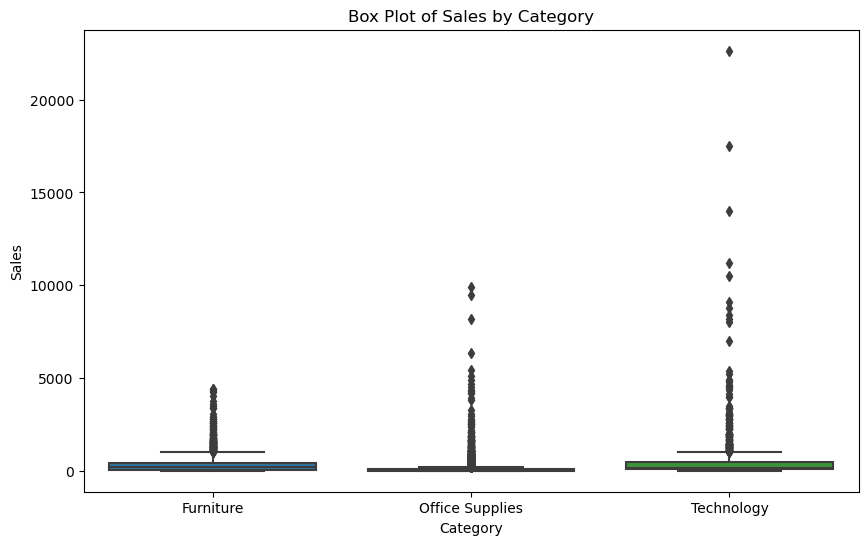

In [211]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=vsstore)
plt.title('Box Plot of Sales by Category')
plt.show()

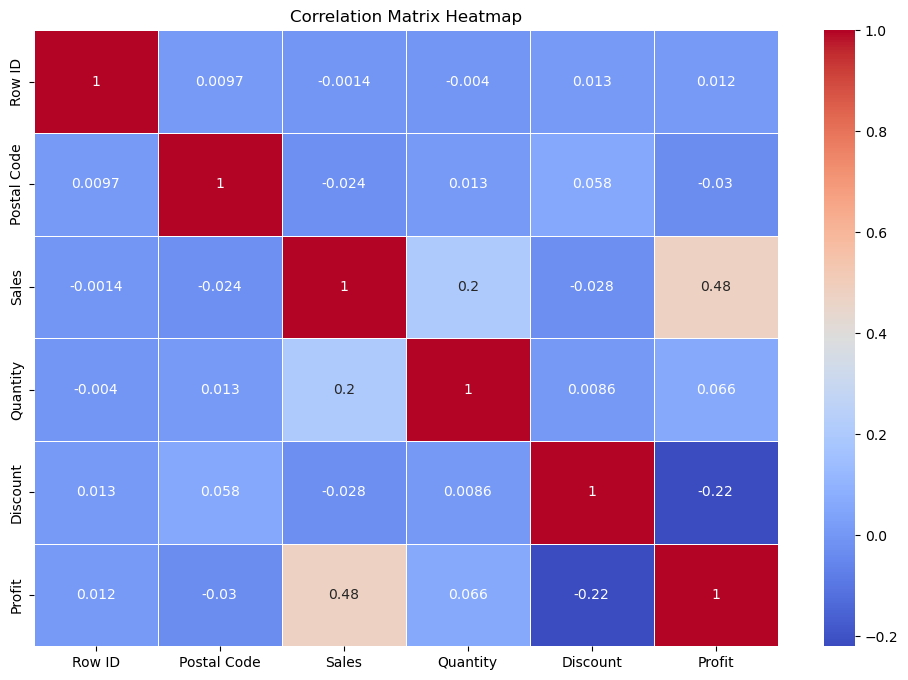

In [24]:
numeric_columns = vsstore.select_dtypes(include=['float64', 'int64'])
correlation_matrix =numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


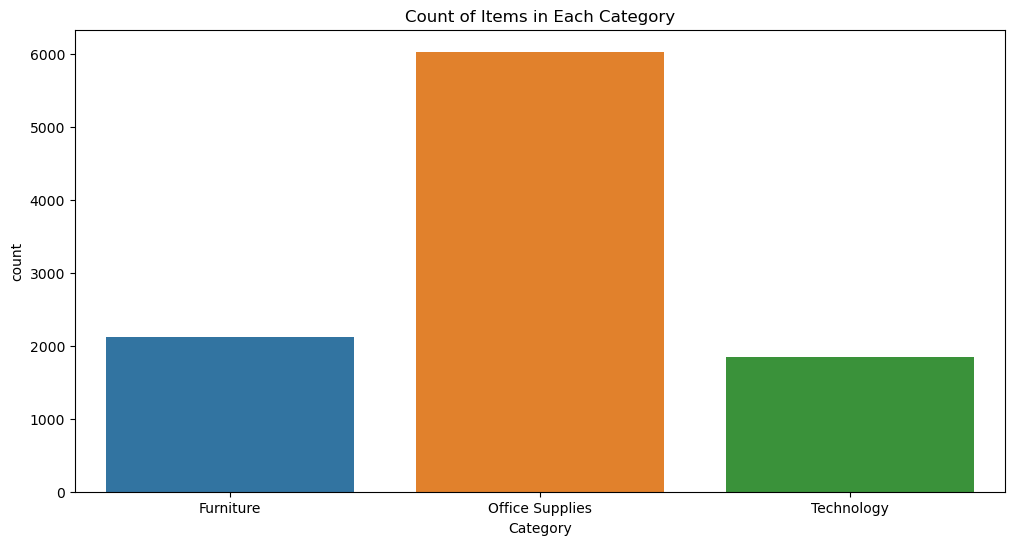

In [25]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=vsstore)
plt.title('Count of Items in Each Category')
plt.show()


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


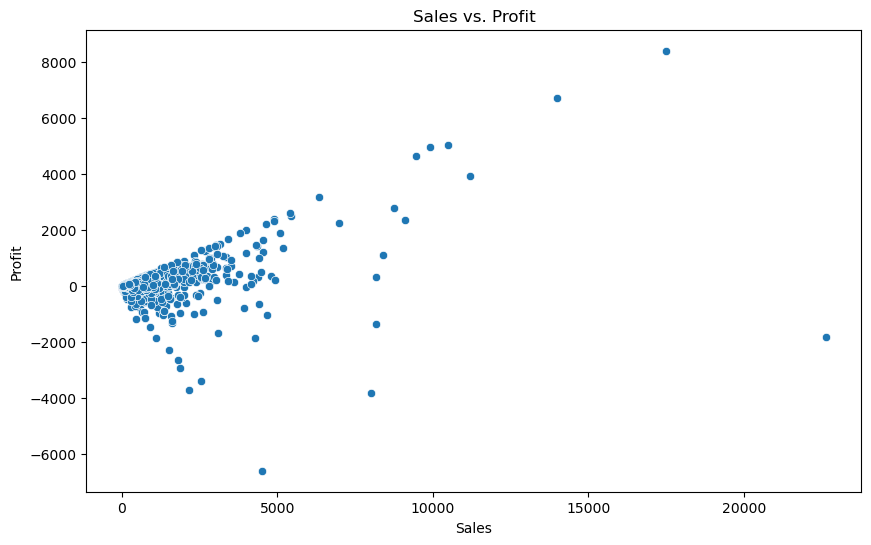

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=vsstore)
plt.title('Sales vs. Profit')
plt.show()


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

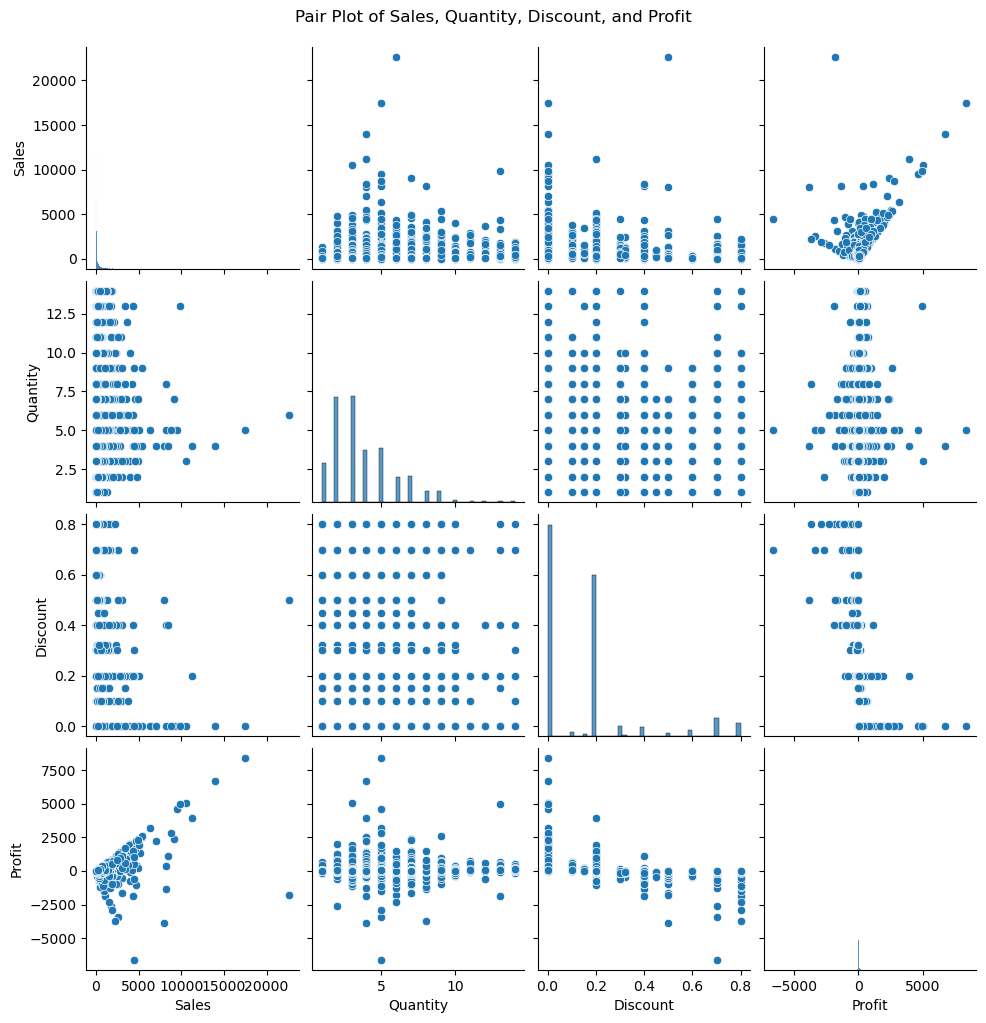

In [28]:
sns.pairplot(vsstore[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.suptitle('Pair Plot of Sales, Quantity, Discount, and Profit', y=1.02)
plt.show()


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

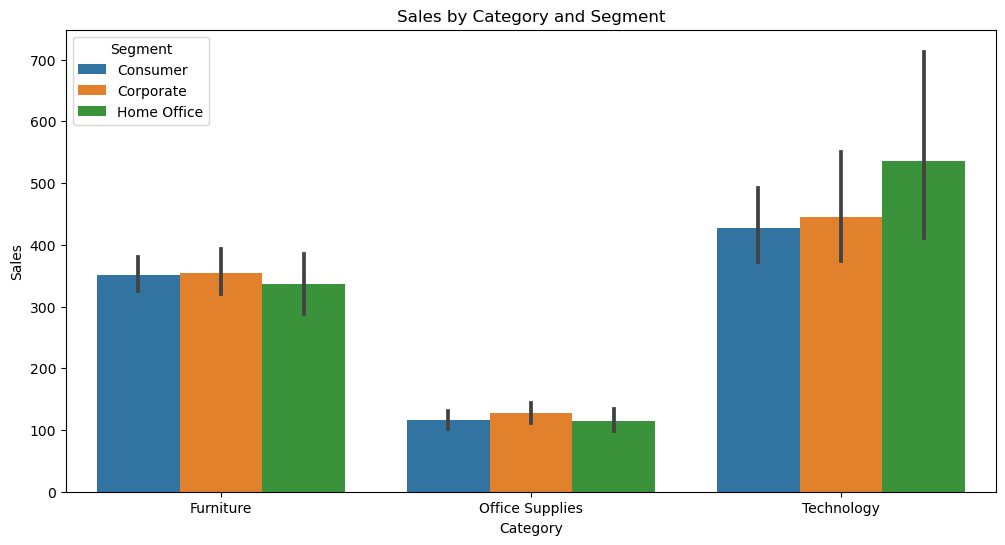

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=vsstore, hue='Segment')
plt.title('Sales by Category and Segment')
plt.show()


Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

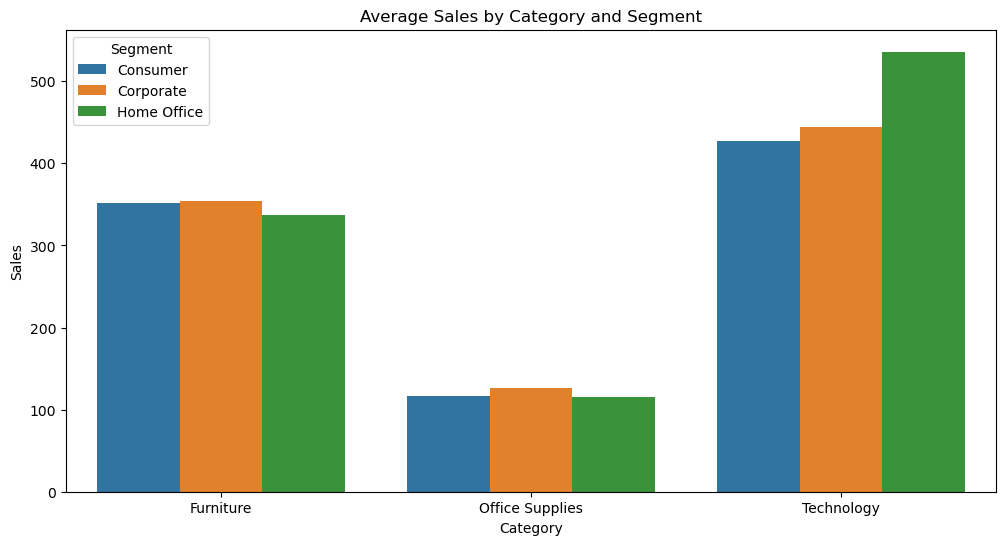

In [36]:
# Check unique values in the 'Segment' column
print(vsstore['Segment'].value_counts())

# Create the bar plot with average sales by category and segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=vsstore.groupby(['Category', 'Segment'])['Sales'].mean().reset_index(), hue='Segment')
plt.title('Average Sales by Category and Segment')
plt.show()


In [42]:
!pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------------------ ------------- 61.4/96.5 kB 550.5 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00


In [677]:
import sqlite3


# Provides the correct path to your SQLite database file & connects to SQlite

In [681]:

db_conn = sqlite3.connect("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\NewECommerce.db")

In [682]:
c= db_conn.cursor()

In [683]:
from sqlite3 import Error

#  Creates the data base design 

In [684]:
#Products
c.execute('''
CREATE TABLE IF NOT EXISTS Products (
    "Category" VARCHAR(30),
    "Subcategory" VARCHAR(30),
    "ProductName" VARCHAR(30),
    "ProductID" VARCHAR(30),
    PRIMARY KEY ("ProductID")
);
''')
#Location
c.execute('''
CREATE TABLE IF NOT EXISTS Location (
    "LocationID" VARCHAR(15),
    "Country" VARCHAR(30),
    "City" VARCHAR(50),
    "State" VARCHAR(50),
    "PostalCode" VARCHAR(15),
    "Region" VARCHAR(30),
    PRIMARY KEY ("LocationID") 
);
''')

#Orders
c.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    "OrderID" VARCHAR(15),
    "OrderDate" DATE,
    "ShipDate" VARCHAR(50),
    "ShipMode" VARCHAR(15),
    "Product" VARCHAR(15),
    "LocationID" VARCHAR(15), 
    PRIMARY KEY ("OrderID"),
    FOREIGN KEY (Product) REFERENCES "Products"(ProductID),
    FOREIGN KEY (LocationID) REFERENCES "Location"(LocationID)
);
''')
#Numbers
c.execute('''
CREATE TABLE IF NOT EXISTS Numbers (
    "Sales" INT,
    "Quantity" SMALLINT,
    "Discount" TINYINT,
    "Profit" INT,
    "OrderID" VARCHAR(15),
    "ProductID" VARCHAR(15),
    FOREIGN KEY (OrderID) REFERENCES "Orders"(OrderID),
    FOREIGN KEY (ProductID) REFERENCES "Products"(ProductID),
    PRIMARY KEY ("OrderID", "ProductID") 
 );
 ''')
#Customers
c.execute('''   
CREATE TABLE IF NOT EXISTS Customers (
    "CustomerID" VARCHAR(15),
    "CustomerName" VARCHAR(30),
    "Segment" VARCHAR(15),
    "OrderID" VARCHAR(15),
    PRIMARY KEY ("CustomerID"),
    FOREIGN KEY (OrderID) REFERENCES "Orders"("OrderID")
);
''')

db_conn.commit()
db_conn.close()

In [ ]:

list_of_tables = ['Products', 'Customers', 'Location', 'Orders', 'Numbers']
dataframes = [product_table, customers_table, location_column, unique_orders_table, unique_numbers_table2]

In [595]:
product_table= product_table.rename(columns={'Product Name': 'ProductName', 'Sub-Category': 'Subcategory','Product ID' : 'ProductID'})
product_table.drop_duplicates()
product_table.reset_index(drop=True, inplace=True)
product_table

,ProductID,ProductName,Category,Subcategory
0,FUR-BO-10001798_1,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454_1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240_1,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577_1,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760_1,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1889,TEC-PH-10002817_1,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589_1,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099_1,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
1892,TEC-PH-10002645_1,LG G2,Technology,Phones


In [597]:
customers_table=customers_table_new.rename(columns={'Customer ID': 'CustomerID', 'Customer Name': 'CustomerName','Order ID' : 'OrderID'})
customers_table.drop_duplicates()
customers_table.reset_index(drop=True, inplace=True)
customers_table

,CustomerID,CustomerName,Segment,OrderID
0,CG-12520,Claire Gute,Consumer,CA-2016-152156
1,DV-13045,Darrin Van Huff,Corporate,CA-2016-138688
2,SO-20335,Sean O'Donnell,Consumer,US-2015-108966
3,BH-11710,Brosina Hoffman,Consumer,CA-2014-115812
4,AA-10480,Andrew Allen,Consumer,CA-2017-114412
...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,CA-2016-163951
789,RS-19870,Roy Skaria,Home Office,CA-2017-142776
790,SC-20845,Sung Chung,Consumer,CA-2016-103128
791,RE-19405,Ricardo Emerson,Consumer,CA-2014-165477


In [599]:
location_column= location_column.rename(columns={'Postal Code': 'PostalCode'})
location_column.drop_duplicates()
location_column.reset_index(drop=True, inplace=True)
location_column


,Country,City,Region,State,PostalCode,LocationID
0,United States,Henderson,South,Kentucky,42420,LL000001
1,United States,Los Angeles,West,California,90036,LL000002
2,United States,Fort Lauderdale,South,Florida,33311,LL000003
3,United States,Los Angeles,West,California,90032,LL000004
4,United States,Concord,South,North Carolina,28027,LL000005
...,...,...,...,...,...,...
627,United States,Springdale,South,Arkansas,72762,LL000628
628,United States,Lodi,West,California,95240,LL000629
629,United States,La Porte,Central,Texas,77571,LL000630
630,United States,Mason,East,Ohio,45040,LL000631


In [608]:
location_column.duplicated(["City", 'PostalCode']).any() #check if its an unique comb0

False

In [609]:
location_column=location_column.rename(columns={'PostalCode': 'Postal Code'}) #to have the same names as in the main table

In [616]:
unique_orders_table=unique_orders_table.rename(columns={'OrderID': 'Order ID'}) #to have the same names as in the main table

# Merges the DataFrames based on 'City' and 'PostalCode'

In [612]:

merged_df = pd.merge(vsstore, location_column, how='left', on=['City', 'Postal Code'])
merged_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country_x,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Country_y,Region_y,State_y,LocationID
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,United States,South,Kentucky,LL000001
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,United States,South,Kentucky,LL000001
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,United States,West,California,LL000002
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,United States,South,Florida,LL000003
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,United States,South,Florida,LL000003



# Merges 'unique_orders_table' with 'merged_df' based on 'OrderID'

In [620]:

orders_table = pd.merge(unique_orders_table, merged_df[['Order ID', 'LocationID']], on='Order ID')
orders_table


,Order ID,Product,OrderDate,ShipDate,ShipMode,LocationID
0,CA-2016-152156,FUR-BO-10001798,11/8/2016,11/11/2016,Second Class,LL000001
1,CA-2016-152156,FUR-BO-10001798,11/8/2016,11/11/2016,Second Class,LL000001
2,CA-2016-138688,OFF-LA-10000240,6/12/2016,6/16/2016,Second Class,LL000002
3,US-2015-108966,FUR-TA-10000577,10/11/2015,10/18/2015,Standard Class,LL000003
4,US-2015-108966,FUR-TA-10000577,10/11/2015,10/18/2015,Standard Class,LL000003
...,...,...,...,...,...,...
7605,CA-2014-110422,FUR-FU-10001889,1/21/2014,1/23/2014,Second Class,LL000124
7606,CA-2017-121258,FUR-FU-10000747,2/26/2017,3/3/2017,Standard Class,LL000147
7607,CA-2017-121258,FUR-FU-10000747,2/26/2017,3/3/2017,Standard Class,LL000147
7608,CA-2017-121258,FUR-FU-10000747,2/26/2017,3/3/2017,Standard Class,LL000147


In [626]:
orders_table1=orders_table.rename(columns={'Order ID' : 'OrderID'})
orders_table1= orders_table.drop_duplicates(subset=["OrderID", "Product"], ignore_index=True)
orders_table1.drop_duplicates()
orders_table1.reset_index(drop=True, inplace=True)
orders_table1

,OrderID,Product,OrderDate,ShipDate,ShipMode,LocationID
0,CA-2016-152156,FUR-BO-10001798,11/8/2016,11/11/2016,Second Class,LL000001
1,CA-2016-138688,OFF-LA-10000240,6/12/2016,6/16/2016,Second Class,LL000002
2,US-2015-108966,FUR-TA-10000577,10/11/2015,10/18/2015,Standard Class,LL000003
3,CA-2014-115812,FUR-FU-10001487,6/9/2014,6/14/2014,Standard Class,LL000004
4,CA-2017-114412,OFF-PA-10002365,4/15/2017,4/20/2017,Standard Class,LL000005
...,...,...,...,...,...,...
3806,CA-2017-163566,OFF-LA-10004484,8/3/2017,8/6/2017,First Class,LL000324
3807,CA-2015-100251,OFF-LA-10003766,5/17/2015,5/23/2015,Standard Class,LL000256
3808,CA-2014-110422,FUR-FU-10001889,1/21/2014,1/23/2014,Second Class,LL000124
3809,CA-2017-121258,FUR-FU-10000747,2/26/2017,3/3/2017,Standard Class,LL000147


In [625]:
orders_table.duplicated(['OrderID', 'Product']).any()#good!

False

In [605]:
numbers_table=unique_numbers_table2.rename(columns={'Order ID' : 'OrderID', 'Product ID' : 'ProductID'})
numbers_table.drop_duplicates()
numbers_table= numbers_table.drop_duplicates(subset=["OrderID", "ProductID"], ignore_index=True)
numbers_table.reset_index(drop=True, inplace=True)
numbers_table

,Sales,Quantity,Discount,Profit,OrderID,ProductID
0,26195.0,2,0.00,4191.0,CA-2016-152156,FUR-BO-10001798
1,73194.0,3,0.00,21958.0,CA-2016-152156,FUR-CH-10000454
2,1462.0,2,0.00,687.0,CA-2016-138688,OFF-LA-10000240
3,95757.0,5,0.45,-38303.0,US-2015-108966,FUR-TA-10000577
4,2236.0,2,0.20,251.0,US-2015-108966,OFF-ST-10000760
...,...,...,...,...,...,...
7677,9798.0,2,0.00,2743.0,US-2016-157728,TEC-PH-10001305
7678,5560.0,4,0.00,1612.0,CA-2015-100251,OFF-SU-10000898
7679,2524.0,3,0.20,410.0,CA-2014-110422,FUR-FU-10001889
7680,2960.0,4,0.00,1332.0,CA-2017-121258,OFF-PA-10004041


In [655]:

list_of_tables = ['Products', 'Customers', 'Location', 'Orders', 'Numbers']
dataframes = [product_table, customers_table, location_column, orders_table1, numbers_table]

In [685]:
import numpy as np
import  sqlite3

# Populating the tables in SQLite

In [693]:
db_conn = sqlite3.connect("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\NewECommerce.db")


In [694]:
c = db_conn.cursor()

In [695]:
df_loc = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Location.csv")#populate Location table

In [696]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      632 non-null    object
 1   City         632 non-null    object
 2   Region       632 non-null    object
 3   State        632 non-null    object
 4   Postal Code  632 non-null    int64 
 5   LocationID   632 non-null    object
dtypes: int64(1), object(5)
memory usage: 29.8+ KB


In [697]:
df_loc = df_loc.rename(columns={'Postal Code': 'PostalCode'})

In [698]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     632 non-null    object
 1   City        632 non-null    object
 2   Region      632 non-null    object
 3   State       632 non-null    object
 4   PostalCode  632 non-null    int64 
 5   LocationID  632 non-null    object
dtypes: int64(1), object(5)
memory usage: 29.8+ KB


In [699]:
db_conn.commit()

In [700]:
db_conn

In [701]:
connection = sqlite3.connect('cash.db', timeout=100)


In [702]:
df_loc.to_sql("Location" ,db_conn, if_exists= "append" , index= False)

632

In [703]:
df_loc1 = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Products.csv") #populate Products table

In [704]:
df_loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    1894 non-null   object
 1   ProductName  1894 non-null   object
 2   Category     1894 non-null   object
 3   Subcategory  1894 non-null   object
dtypes: object(4)
memory usage: 59.3+ KB


In [705]:
db_conn.commit()

In [706]:
db_conn

In [707]:
connection = sqlite3.connect('cash.db', timeout=100)

In [709]:
df_loc1.to_sql("Products" ,db_conn, if_exists= "append" , index= False)

1894

In [711]:
df_loc2 = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Orders.csv")#populate Products

In [712]:
df_loc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     3811 non-null   object
 1   Product     3811 non-null   object
 2   OrderDate   3811 non-null   object
 3   ShipDate    3811 non-null   object
 4   ShipMode    3811 non-null   object
 5   LocationID  3811 non-null   object
dtypes: object(6)
memory usage: 178.8+ KB


In [713]:
db_conn.commit()

In [714]:
db_conn

In [715]:
connection = sqlite3.connect('cash.db', timeout=100)

In [716]:
df_loc2.to_sql("Orders" ,db_conn, if_exists= "append" , index= False)

3811

In [717]:
df_loc3 = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Numbers.csv")#populate Numbers

In [718]:
df_loc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sales      7682 non-null   float64
 1   Quantity   7682 non-null   int64  
 2   Discount   7682 non-null   float64
 3   Profit     7682 non-null   float64
 4   OrderID    7682 non-null   object 
 5   ProductID  7682 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 360.2+ KB


In [719]:
db_conn.commit()

In [720]:
connection = sqlite3.connect('cash.db', timeout=100)

In [721]:
df_loc3.to_sql("Numbers" ,db_conn, if_exists= "append" , index= False)

7682

In [723]:
df_loc4 = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\SQL\\Customers.csv")#populate Customers

In [724]:
df_loc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    793 non-null    object
 1   CustomerName  793 non-null    object
 2   Segment       793 non-null    object
 3   OrderID       793 non-null    object
dtypes: object(4)
memory usage: 24.9+ KB


In [725]:
db_conn.commit()

In [726]:
connection = sqlite3.connect('cash.db', timeout=100)

In [727]:
df_loc4.to_sql("Customers" ,db_conn, if_exists= "append" , index= False)

793

In [756]:

vsstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Creates tables for Unsuperviesed ML (ML Clustering with K-means)

# creates a new DataFrame by grouping the customers based on their ID and summing the Sales column

In [758]:
vsstore_monetary = vsstore.groupby('Customer ID', as_index=False)['Sales'].sum()
vsstore_monetary

,Customer ID,Sales
788,XP-21865,2374.658
789,YC-21895,5454.350
790,YS-21880,6720.444
791,ZC-21910,8025.707
792,ZD-21925,1493.944


# the same with Frequency (How many unique Order IDs are there per customer?)

In [782]:

df_fr = vsstore.groupby('Customer ID', as_index=False)['Order ID'].count()
df_fr.tail()
df_fr = df_fr.rename(columns={'Customer ID': 'CustomerID'})
df_fr.tail()

,CustomerID,Order ID
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31
792,ZD-21925,9


In [767]:
vsstore['OrderDate'] = pd.to_datetime(vsstore['Order Date'])


In [768]:
missing_values = vsstore[['Order Date', 'Customer ID']].isnull().sum()
print(missing_values)


Order Date     0
Customer ID    0
dtype: int64


# the Recency (Calculate it from the last order date in the dataset) 

In [779]:

vsstore['Order Date'] = pd.to_datetime(vsstore['Order Date'])
max_order_date_per_customer = vsstore.groupby('Customer ID')['Order Date'].max() # Finds the maximum order date for each customer
last_date_in_vsstore = vsstore['Order Date'].max() # Uses the last date in the df as the reference date
recency = (last_date_in_vsstore - max_order_date_per_customer).dt.days # Calculates the recency by subtracting the maximum order date from the last date in the DataFrame

vsstore_recency = pd.DataFrame({ 'Recency': recency.values})
vsstore_recency.head()



,Recency
0,184
1,19
2,259
3,55
4,415


# merges the three dfs

In [785]:
result = pd.concat([vsstore_monetary, df_fr, vsstore_recency], axis=1)
result_new=result.drop(columns="CustomerID")
result_new

,Customer ID,Sales,Order ID,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415
...,...,...,...,...
788,XP-21865,2374.658,28,43
789,YC-21895,5454.350,8,4
790,YS-21880,6720.444,12,9
791,ZC-21910,8025.707,31,54


# some EDA

c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


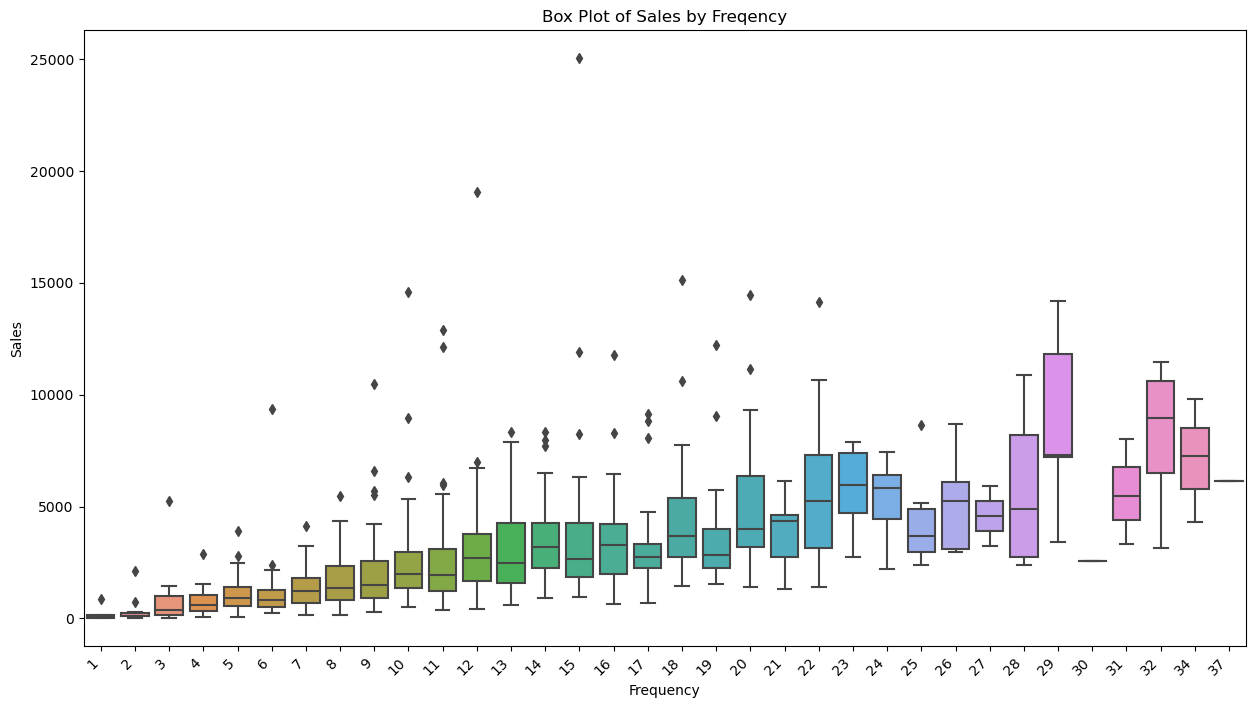

In [793]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Order ID', y='Sales', data=result_new)
plt.title('Box Plot of Sales by Freqency')
plt.xlabel('Frequency')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


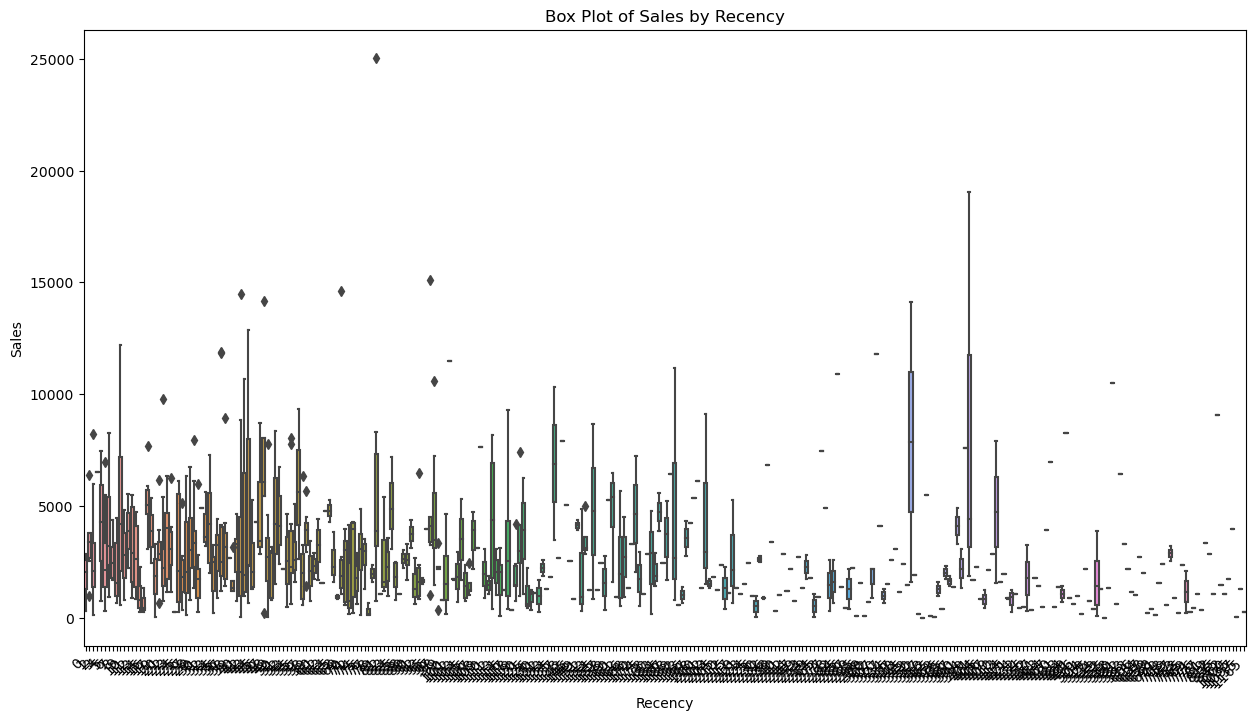

In [797]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Recency', y='Sales', data=result_new)
plt.title('Box Plot of Sales by Recency')
plt.xlabel('Recency')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Converts relevant columns to numeric

In [806]:

result_new['Sales'] = pd.to_numeric(result_new['Sales'], errors='coerce')
result_new['Order ID'] = pd.to_numeric(result_new['Order ID'], errors='coerce')
result_new['Recency'] = pd.to_numeric(result_new['Recency'], errors='coerce')
# Drops rows with NaN values
result_new = result_new.dropna()

# Removes each feature's (statistical) outliers using the Interquartile Range (IQR is the difference between the upper quartile and the lower quartile).

In [808]:

Q1 = result_new[['Sales', 'Order ID', 'Recency']].quantile(0.25)
Q3 = result_new[['Sales', 'Order ID', 'Recency']].quantile(0.75)
IQR = Q3 - Q1

# filters outliers based on IQR
def remove_outliers(row):
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (row >= lower_bound) & (row <= upper_bound)

# filter outliers for each feature
filtered_data = result_new[result_new[['Sales', 'Order ID', 'Recency']].apply(remove_outliers, axis=1).all(axis=1)]



In [812]:
!pip install scikit-learn

In [814]:
from sklearn.preprocessing import StandardScaler

# Feature scaling

In [815]:

rfm_df = result_new[['Sales', 'Order ID', 'Recency']]
scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Sales', 'Order ID', 'Recency']
rfm_df_scaled.head()

,Sales,Order ID,Recency
0,1.015112,-0.256912,0.199889
1,-0.700590,0.384256,-0.686762
2,-0.421139,-0.096620,0.602912
3,0.833680,0.865131,-0.493311
4,-0.765391,-1.058371,1.441199


# Building the model

In [849]:
from sklearn.cluster import KMeans
from collections import Counter

kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)
labels = kmeans.labels_
cluster_counts = Counter(labels)

print(sorted(cluster_counts.items()))


c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[(0, 277), (1, 105), (2, 63), (3, 348)]


In [853]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters=2, the silhouette score is 0.3464950700751231


c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters=3, the silhouette score is 0.39485705030930995


c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dariy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

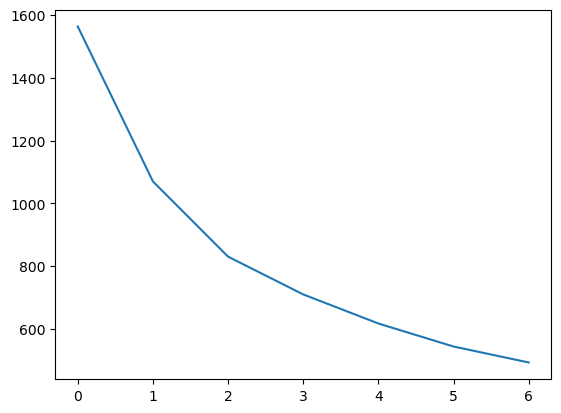

In [832]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [854]:
rfm_df['Cluster_Id'] = kmeans.labels_

rfm_df=rfm_df.rename(columns={'Order ID':"Frequency"})
print(rfm_df.head())

      Sales  Freqency  Recency  Cluster_Id
0  5563.560        11      184           1
1  1056.390        15       19           1
2  1790.512        12      259           1
3  5086.935        18       55           2
4   886.156         6      415           0


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster_Id', ylabel='Sales'>

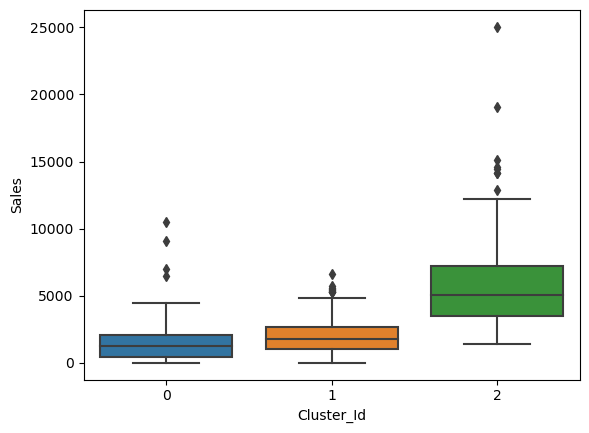

In [855]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Sales', data=rfm_df)

c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster_Id', ylabel='Freqency'>

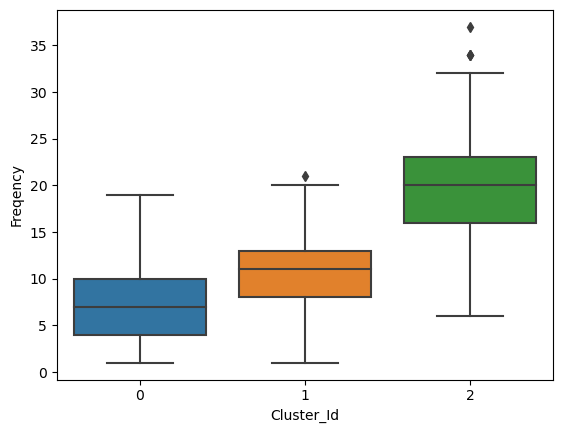

In [856]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Freqency', data=rfm_df)


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Cluster_Id', ylabel='Recency'>

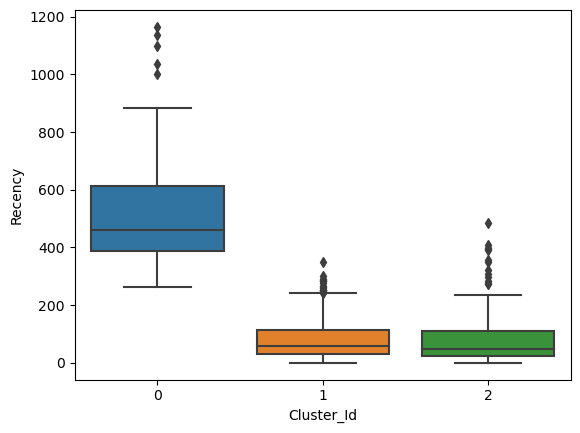

In [857]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)